In [1]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [2]:
app = mocoreg(register_to_frame_zero=True)
#app.debug = True
app.read_4d_bmode_matlab_file('../Data/05242023_EXP10_batch6_FirstFrame.dat', nframes=201, nlateral=102, nelevation=102, ndepth=92)

max_keyframe_interval 33
keyframe_search_stepsize 5


In [7]:
app.compute_keyframes()

In [8]:
print(app.keyframes)

[0, 32, 64, 69, 74, 79, 89, 99, 114, 139, 171, 200]


In [9]:
# Make frame 1 a keyframe
app.keyframes = [0, 1] + app.keyframes[1:]
print(app.keyframes)

[0, 1, 32, 64, 69, 74, 79, 89, 99, 114, 139, 171, 200]


In [10]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 1 of 12: Frame = 1


itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


Registering set 2 of 12: Frame = 32
Registering set 3 of 12: Frame = 64
Registering set 4 of 12: Frame = 69
Registering set 5 of 12: Frame = 74
Registering set 6 of 12: Frame = 79
Registering set 7 of 12: Frame = 89
Registering set 8 of 12: Frame = 99
Registering set 9 of 12: Frame = 114
Registering set 10 of 12: Frame = 139
Registering set 11 of 12: Frame = 171
Registering set 12 of 12: Frame = 200
Done!
Time required for registration (seconds) =  101.33238610000001


In [11]:
app.interpolate_keyframe_transforms(window=3)

In [12]:
app.save_matrix_transforms("test_matrix.tfm")

In [13]:
app.apply_transforms()

In [14]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
print(len(tmp), len(app.data_array))
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])

200 201


In [15]:
from matplotlib import pyplot as plt

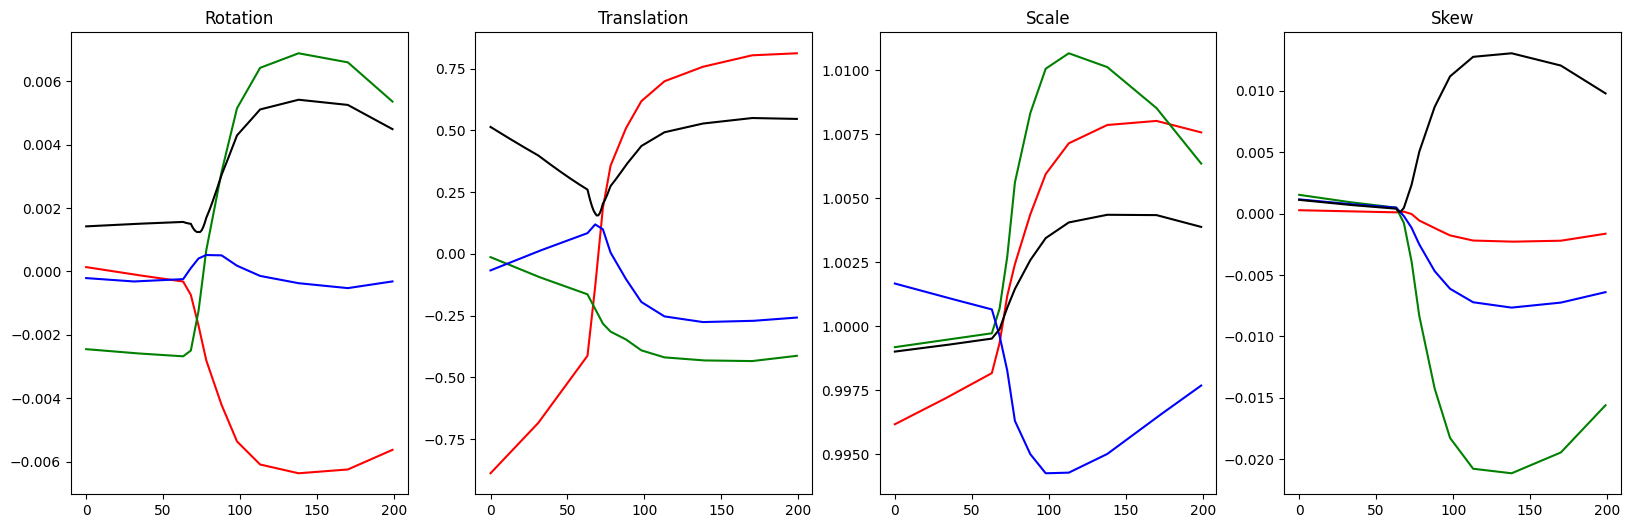

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
rlim = plt.gca().get_ylim()
plt.title("Rotation")
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
tlim = plt.gca().get_ylim()
plt.title("Translation")
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
slim = plt.gca().get_ylim()
plt.title("Scale")
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
klim = plt.gca().get_ylim()
plt.title("Skew");

In [17]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [18]:
print(diffs, meansq)
print("")
print(diffs_reg, meansq_reg)

[0.03145357536159506, 0.0391891646839872, 0.02875363124512089, 0.026473219908335968, 0.0232459633250668, 0.020345675062721974, 0.018562569289165103, 0.020745301814009156, 0.018375379456915933, 0.01811517412291469, 0.0181746443904236, 0.016505207522998413] 0.02423931417857858

[0.024608122013366297, 0.03537678411806788, 0.023890540750457153, 0.023607610283786783, 0.02257520843722374, 0.020581858191830442, 0.01987526526413048, 0.02230129829978748, 0.02053053521365852, 0.020418909744425496, 0.020029016236816893, 0.018588313701428574] 0.023086616561328238


In [19]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

18537.185490476193
15773.618948985733


In [20]:
app2 = mocoreg(register_to_frame_zero=True)
app2.data_array = app.data_array_reg
app2.compute_keyframes()
app2.keyframes = [0, 1] + app2.keyframes[1:]
print("Using new frames =", app2.keyframes)

max_keyframe_interval 33
keyframe_search_stepsize 5
Using new frames = [0, 1, 32, 64, 69, 74, 84, 94, 109, 134, 166, 198, 200]


In [21]:
start_time2 = time.perf_counter()
app2.register_keyframes()  # app.keyframes)
end_time2 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time2-start_time2)

Registering set 1 of 12: Frame = 1
Registering set 2 of 12: Frame = 32
Registering set 3 of 12: Frame = 64
Registering set 4 of 12: Frame = 69
Registering set 5 of 12: Frame = 74
Registering set 6 of 12: Frame = 84
Registering set 7 of 12: Frame = 94
Registering set 8 of 12: Frame = 109
Registering set 9 of 12: Frame = 134
Registering set 10 of 12: Frame = 166
Registering set 11 of 12: Frame = 198
Registering set 12 of 12: Frame = 200
Done!
Time required for registration (seconds) =  92.22122120000006


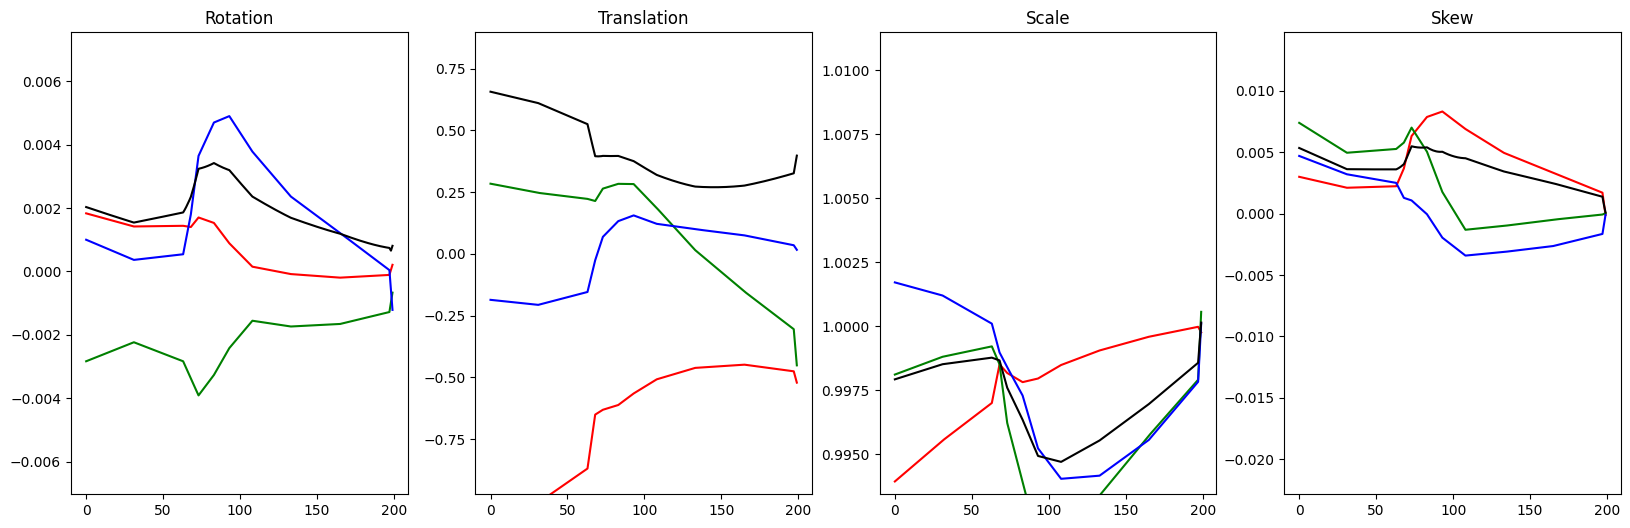

In [22]:
app2.interpolate_keyframe_transforms(window=2)
app2.apply_transforms()
tmp = [ list(app2.transforms[x].GetParameters()) for x in range(len(app2.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [23]:
import itk

yOrg = app.data_array[:,:,50,:].astype(np.float32)
yReg = app.data_array_reg[:,:,50,:].astype(np.float32)
yRegReg = app2.data_array_reg[:,:,50,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yOrg), "org.mha")
itk.imwrite(itk.GetImageFromArray(yReg), "reg.mha")
itk.imwrite(itk.GetImageFromArray(yRegReg), "regreg.mha")

In [24]:
app3 = mocoreg(register_to_frame_zero=True)
app3.data_array = app2.data_array_reg
app3.compute_keyframes()
app3.keyframes = [0, 1] + app3.keyframes[1:]
print("Using new frames =", app3.keyframes)

max_keyframe_interval 33
keyframe_search_stepsize 5
Using new frames = [0, 1, 32, 64, 69, 79, 89, 104, 124, 156, 188, 200]


In [25]:
start_time3 = time.perf_counter()
app3.register_keyframes()  # app.keyframes)
end_time3 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time3-start_time3)

Registering set 1 of 11: Frame = 1
Registering set 2 of 11: Frame = 32
Registering set 3 of 11: Frame = 64
Registering set 4 of 11: Frame = 69
Registering set 5 of 11: Frame = 79
Registering set 6 of 11: Frame = 89
Registering set 7 of 11: Frame = 104
Registering set 8 of 11: Frame = 124
Registering set 9 of 11: Frame = 156
Registering set 10 of 11: Frame = 188
Registering set 11 of 11: Frame = 200
Done!
Time required for registration (seconds) =  55.15241819999994


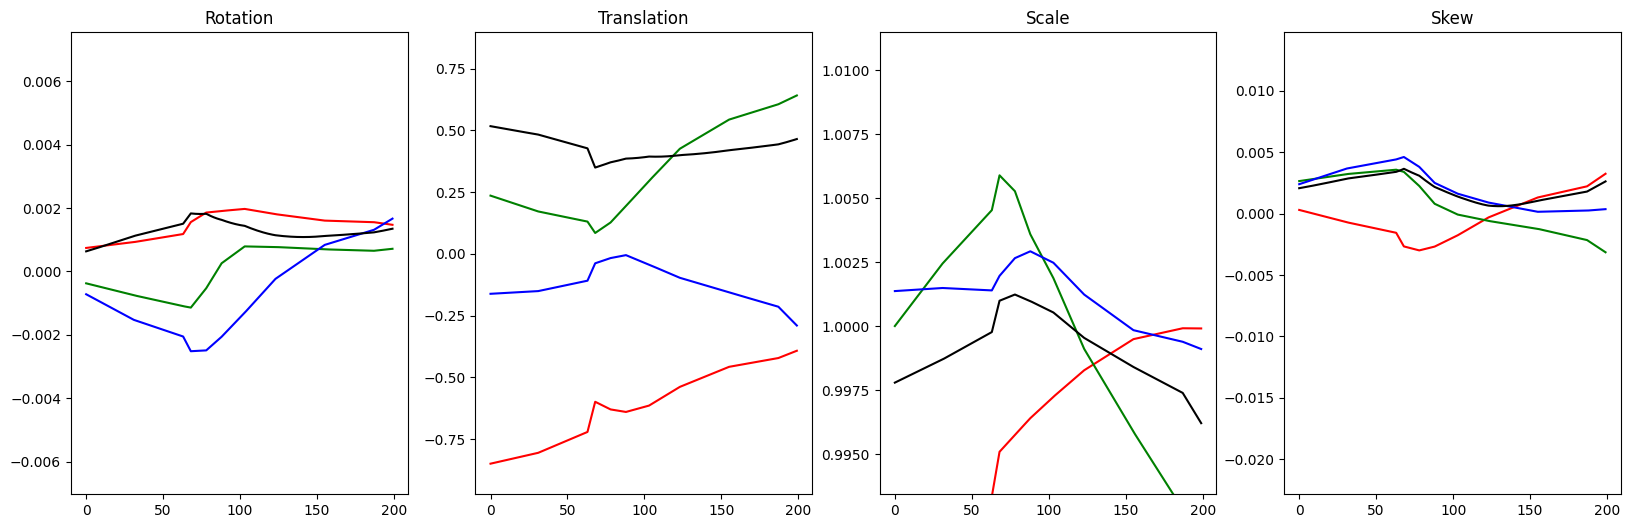

In [26]:
app3.interpolate_keyframe_transforms(window=2)
app3.apply_transforms()
tmp = [ list(app3.transforms[x].GetParameters()) for x in range(len(app3.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);